## Join the data from Part 1 with the data from Part 2 to create a new dataframe.

#### Import libraries

In [108]:
import pandas as pd
import sqlite3
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from colorama import Fore, Style

#### Step 1: Import CSV files from CityBikes, Yelp, and FourSquare

In [109]:
# load CityBikes dataframe
city_bikes_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/data/CSV_files/London_CityBikes_Data.csv')

# load Yelp parks dataframe
yelp_parks_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/data/CSV_files/yelp_parks_df.csv')

# load Yelp restaurants dataframe
yelp_restaurants_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/data/CSV_files/yelp_restaurants_df.csv')

# load Foursquare parks dataframe
foursquare_parks_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/data/CSV_files/foursquare_parks_df.csv')

# load FourSquare restaurants dataframe
foursquare_restaurants_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/data/CSV_files/foursquare_restaurants_df.csv')




### Step 2: Merge DataFrames Together

In [110]:
#rename CityBikes 'name' column to 'location' to be able to perform merge
city_bikes_df = city_bikes_df.rename(columns={'name': 'location'})

#rename FourSquare Parks 'name' column to 'location' to be able to perform merge
foursquare_parks_df = foursquare_parks_df.rename(columns={'location_name': 'location'})

#rename FourSquare Restaurants 'name' column to 'location' to be able to perform merge
foursquare_restaurants_df = foursquare_restaurants_df.rename(columns={'location_name': 'location'})

In [111]:
# merge Yelp DataFrames based on the location column
merged_yelp_df = pd.concat([yelp_parks_df, yelp_restaurants_df], axis=0)

# merge FourSquare DataFrames based on the location column
merged_foursquare_df = pd.concat([foursquare_parks_df, foursquare_restaurants_df], axis=0)

# merge Foursquare and CityBikes DataFrames based on the location column (left-join)
merged_yelp_citybikes = pd.merge(merged_yelp_df, city_bikes_df, on='location', how='left')

# merge Foursquare and CityBikes DataFrames based on the location column (left-join)
merged_foursquare_citybikes = pd.merge(merged_foursquare_df, city_bikes_df, on='location', how='left')

In [112]:
# #Removing id and fsq_id, as they do not add to the data
merged_yelp_citybikes = merged_yelp_citybikes.drop('id', axis=1)
merged_foursquare_citybikes = merged_foursquare_citybikes.drop('fsq_id', axis=1)

#Adding Type descriptive labels to differentiate the data when combined (as categories and poi type does not provide uniform type names)
yelp_parks_df['Type'] = 'Park'
yelp_restaurants_df['Type'] = 'Restaurant'
foursquare_restaurants_df['Type'] = 'Restaurant'
foursquare_parks_df['Type'] = 'Park'


In [113]:
# merged_yelp_citybikes.to_csv('merged_yelp_citybikes.csv', index=False)

# # export foursquare/citybikes DataFrame to Csv file
merged_foursquare_citybikes.to_csv('merged_foursquare_citybikes.csv', index=False)

# load merged_yelp_citybikes dataframe
yelp_citybikes = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/data/CSV_files/merged_yelp_citybikes.csv')

# load foursquare/citybikes DataFrame parks dataframe
foursquare_citybikes = pd.read_csv('/Users/brittanyharding/LHL-Projects/Statistical-Modelling-with-Python/data/CSV_files/merged_foursquare_citybikes.csv')

###  Step 3: EDA and Data Visualization. 

In [ ]:
# Count to see how many parks and restaurants
count = foursquare_citybikes['poi_type'].str.count('Park').sum()
print('Number of Parks:', count)

count = foursquare_citybikes['poi_type'].str.count('Restaurant').sum()
print('Number of Restaurants:', count)


##### Comparison of the number of parks and the number of restaurants that were found in both a 250 M radius of bike stations on Foursquare and Yelp.

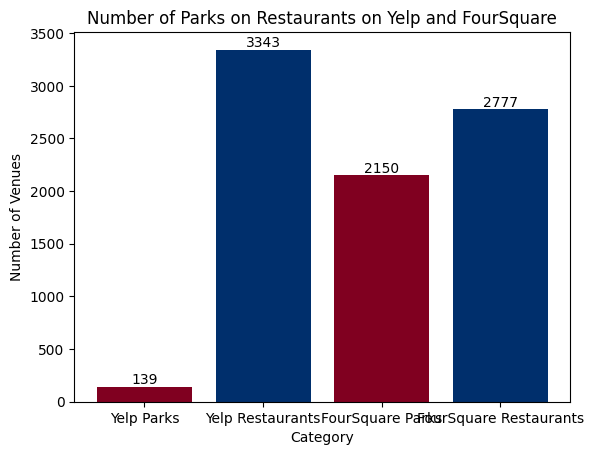

In [127]:
import matplotlib.pyplot as plt

# Add the data calculated above from the Type Variable
yelp_parks = 139
yelp_restaurants = 3343
foursquare_parks = 2150
foursquare_restaurants = 2777

# Create a bar chart with custom colors
labels = ['Yelp Parks', 'Yelp Restaurants', 'FourSquare Parks', 'FourSquare Restaurants']
values = [yelp_parks, yelp_restaurants, foursquare_parks, foursquare_restaurants]
colors = ['#800020', '#002F6C', '#800020', '#002F6C']  # black, white, navy, white
plt.bar(labels, values, color=colors)

# Set the chart title and axis labels
plt.title('Number of Parks on Restaurants on Yelp and FourSquare')
plt.xlabel('Category')
plt.ylabel('Number of Venues')

# Add number values to the bars
for i, value in enumerate(values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Save the figure as PNG
plt.savefig('Number of Parks on Restaurants on Yelp and FourSquare', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()


### EDA Stats for Yelp CityBikes Data

##### I ran some EDA tests across my Yelp CityBikes table, so that I coud be better aware of what was included inside my data

In [114]:
# print first 5 rows of the data to check completeness
yelp_citybikes.head(-5)

,name,location,categories,rating,price,Type,latitude,longitude,free_bikes
0,Leicester Square Gardens,"001163 - Wardour Street, Soho","[{'alias': 'landmarks', 'title': 'Landmarks & ...",3.5,NaN,Park,51.512515,-0.133202,16
1,Leicester Square,"001163 - Wardour Street, Soho","[{'alias': 'landmarks', 'title': 'Landmarks & ...",4.0,NaN,Park,51.512515,-0.133202,16
2,Allen Gardens,"200003 - Cheshire Street, Bethnal Green","[{'alias': 'parks', 'title': 'Parks'}]",5.0,NaN,Park,51.523880,-0.065076,18
3,Weavers Fields,"200003 - Cheshire Street, Bethnal Green","[{'alias': 'parks', 'title': 'Parks'}]",4.0,NaN,Park,51.523880,-0.065076,18
4,Myddelton Square Park,"001104 - Claremont Square, Angel","[{'alias': 'parks', 'title': 'Parks'}]",3.0,NaN,Park,51.531667,-0.109915,11
...,...,...,...,...,...,...,...,...,...
3562,Garys Fish House,"200027 - Ford Road, Old Ford","[{'alias': 'fishnchips', 'title': 'Fish & Chip...",5.0,£,Restaurant,51.532513,-0.033085,4
3563,Fiesta's Cafe,"200027 - Ford Road, Old Ford","[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,£,Restaurant,51.532513,-0.033085,4
3564,Lord Morpeth,"200027 - Ford Road, Old Ford","[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,££,Restaurant,51.532513,-0.033085,4
3565,St Paul's Cafe Bow,"200027 - Ford Road, Old Ford","[{'alias': 'cafes', 'title': 'Cafes'}]",5.0,£,Restaurant,51.532513,-0.033085,4


In [115]:
# I wanted to convert the price values to numbers so they could be analized
 
# Create a new column 'price_num' with converted price values
yelp_citybikes['price_num'] = yelp_citybikes['price'].replace({'£': 1, '££': 2, '£££': 3, '££££': 4})

#Drop old price column
yelp_citybikes = yelp_citybikes.drop('price', axis=1)

# yelp_citybikes.to_csv('clean_yelp_citybikes.csv', index=False)

# Print the first 10 rows of the DataFrame to check if the new column is added
yelp_citybikes.head(-5)



,name,location,categories,rating,Type,latitude,longitude,free_bikes,price_num
0,Leicester Square Gardens,"001163 - Wardour Street, Soho","[{'alias': 'landmarks', 'title': 'Landmarks & ...",3.5,Park,51.512515,-0.133202,16,NaN
1,Leicester Square,"001163 - Wardour Street, Soho","[{'alias': 'landmarks', 'title': 'Landmarks & ...",4.0,Park,51.512515,-0.133202,16,NaN
2,Allen Gardens,"200003 - Cheshire Street, Bethnal Green","[{'alias': 'parks', 'title': 'Parks'}]",5.0,Park,51.523880,-0.065076,18,NaN
3,Weavers Fields,"200003 - Cheshire Street, Bethnal Green","[{'alias': 'parks', 'title': 'Parks'}]",4.0,Park,51.523880,-0.065076,18,NaN
4,Myddelton Square Park,"001104 - Claremont Square, Angel","[{'alias': 'parks', 'title': 'Parks'}]",3.0,Park,51.531667,-0.109915,11,NaN
...,...,...,...,...,...,...,...,...,...
3562,Garys Fish House,"200027 - Ford Road, Old Ford","[{'alias': 'fishnchips', 'title': 'Fish & Chip...",5.0,Restaurant,51.532513,-0.033085,4,1.0
3563,Fiesta's Cafe,"200027 - Ford Road, Old Ford","[{'alias': 'breakfast_brunch', 'title': 'Break...",4.0,Restaurant,51.532513,-0.033085,4,1.0
3564,Lord Morpeth,"200027 - Ford Road, Old Ford","[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",4.0,Restaurant,51.532513,-0.033085,4,2.0
3565,St Paul's Cafe Bow,"200027 - Ford Road, Old Ford","[{'alias': 'cafes', 'title': 'Cafes'}]",5.0,Restaurant,51.532513,-0.033085,4,1.0


In [116]:
# Print Data Info to check for nulls and object types
print(tabulate(yelp_citybikes.info(), headers='keys', tablefmt='fancy_grid', showindex=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572 entries, 0 to 3571
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        3572 non-null   object 
 1   location    3572 non-null   object 
 2   categories  3572 non-null   object 
 3   rating      3572 non-null   float64
 4   Type        3572 non-null   object 
 5   latitude    3572 non-null   float64
 6   longitude   3572 non-null   float64
 7   free_bikes  3572 non-null   int64  
 8   price_num   2300 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 251.3+ KB



In [117]:
# Data I want to look at set as a variable
yelp_descrip = yelp_citybikes.describe()

# Renaming the columns to be more descriptive
yelp_descrip = yelp_descrip.rename(columns={
    'count': 'Number of observations',
    'mean': 'Mean value',
    'std': 'Standard deviation',
    'min': 'Minimum value',
    '25%': '25th percentile',
    '50%': 'Median value',
    '75%': '75th percentile',
    'max': 'Maximum value'
})

# Adding color to latitude and longitude columns - as they are not relavent to summary stats.
for col in ['latitude', 'longitude']:
    yelp_descrip[col] = yelp_descrip[col].apply(lambda x: f'{Fore.RED}{x}{Style.RESET_ALL}')

print(tabulate(yelp_descrip, headers='keys', tablefmt='psql'))

+-------+-------------+--------------+--------------+--------------+-------------+
|       |      rating |     latitude |    longitude |   free_bikes |   price_num |
|-------+-------------+--------------+--------------+--------------+-------------|
| count | 3572        | 3572         | 3572         |   3572       | 2300        |
| mean  |    3.80949  |   51.5074    |   -0.136093  |     14.0342  |    1.97652  |
| std   |    0.984991 |    0.0185617 |    0.0491151 |      9.52804 |    0.728089 |
| min   |    0        |   51.4568    |   -0.229117  |      0       |    1        |
| 25%   |    3.5      |   51.4956    |   -0.174411  |      6       |    2        |
| 50%   |    4        |   51.5081    |   -0.137044  |     12       |    2        |
| 75%   |    4.5      |   51.5216    |   -0.106824  |     20       |    2        |
| max   |    5        |   51.5468    |   -0.00699   |     63       |    4        |
+-------+-------------+--------------+--------------+--------------+-------------+


In [129]:
# Count to see how many parks on Yelp
count = yelp_citybikes['Type'].str.count('Park').sum()
print('Number of Parks on Yelp:', count)

# Count to see how many restaurants on Yelp
count = yelp_citybikes['Type'].str.count('Restaurant').sum()
print('Number of Restaurants on Yelp:', count)

# Count to see how many parks on FourSquare
count = foursquare_citybikes['poi_type'].str.count('Park').sum()
print('Number of Parks on FourSquare:', count)

# Count to see how many restaurants on FourSquare
count = foursquare_citybikes['poi_type'].str.count('Restaurant').sum()
print('Number of Restaurants on FourSquare:', count)

Number of Parks on Yelp: 139
Number of Restaurants on Yelp: 3433
Number of Parks on FourSquare: 2150
Number of Restaurants on FourSquare: 2777


##### Create Scatterplot comparing park and restaurant ratings to available bikes

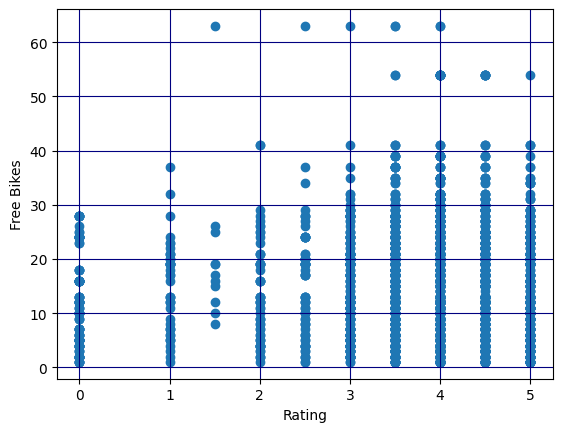

In [128]:
import matplotlib.pyplot as plt

# filter out entries where free_bikes is 0
yelp_citybikes_filtered = yelp_citybikes[yelp_citybikes['free_bikes'] != 0]

# set color scheme
plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['grid.color'] = 'navy'
plt.rcParams['grid.linestyle'] = '-'

# create scatter plot
plt.scatter(yelp_citybikes_filtered['rating'], yelp_citybikes_filtered['free_bikes'])
plt.xlabel('Rating')
plt.ylabel('Free Bikes')
plt.grid(True)

# Save the figure as PNG
# plt.savefig('yelp_citybikes_scatterplot.png', dpi=300, bbox_inches='tight')

#Display Chart
plt.show()

### EDA Stats for Foursquare CityBikes Data

##### I also ran some EDA tests across my FourSquare CityBikes table, so that I coud be better aware of what was included inside the data

In [132]:
# print first 5 rows of the data to check completeness
foursquare_citybikes.head(-5)


,location,name,poi_type,rating,price,Type,latitude,longitude,free_bikes
0,"003486 - St. Luke's Church, Chelsea",St Luke's Garden,['Park'],NaN,NaN,Park,51.489717,-0.170194,17
1,"003486 - St. Luke's Church, Chelsea",Lennox Gardens,['Park'],NaN,NaN,Park,51.489717,-0.170194,17
2,"003486 - St. Luke's Church, Chelsea",Cadogan Square Small Garden Limited,"['Property Management Office', 'Real Estate Ag...",NaN,NaN,Park,51.489717,-0.170194,17
3,"003486 - St. Luke's Church, Chelsea",Markham Square,['Park'],NaN,NaN,Park,51.489717,-0.170194,17
4,"003486 - St. Luke's Church, Chelsea",Tedworth Square,['Park'],NaN,NaN,Park,51.489717,-0.170194,17
...,...,...,...,...,...,...,...,...,...
5928,"003465 - Eccleston Place, Victoria",The Thomas Cubitt,"['Bar', 'Gastropub']",NaN,NaN,Restaurant,51.493951,-0.147624,15
5929,"003465 - Eccleston Place, Victoria",London Victoria Railway Station (VIC),['Rail Station'],NaN,NaN,Restaurant,51.493951,-0.147624,15
5930,"001023 - River Street , Clerkenwell",Myddelton Square,['Park'],NaN,NaN,Restaurant,51.529163,-0.109971,2
5931,"001023 - River Street , Clerkenwell",Percy Circus,['Park'],NaN,NaN,Restaurant,51.529163,-0.109971,2


In [24]:
# print basic info about the data
print(foursquare_citybikes.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    5938 non-null   object 
 1   name        5938 non-null   object 
 2   poi_type    5938 non-null   object 
 3   Type        5938 non-null   object 
 4   latitude    5938 non-null   float64
 5   longitude   5938 non-null   float64
 6   free_bikes  5938 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 324.9+ KB
None


In [126]:
foursquare_summary = foursquare_citybikes[['free_bikes', 'latitude', 'longitude']].describe()

# Renaming the columns to be more descriptive
foursquare_summary = foursquare_summary.rename(columns={
    'count': 'Number of observations',
    'mean': 'Mean value',
    'std': 'Standard deviation',
    'min': 'Minimum value',
    '25%': '25th percentile',
    '50%': 'Median value',
    '75%': '75th percentile',
    'max': 'Maximum value'
})

# Adding color to latitude and longitude columns
for col in ['latitude', 'longitude']:
    foursquare_summary[col] = foursquare_summary[col].apply(lambda x: f'{Fore.RED}{x}{Style.RESET_ALL}')

print(tabulate(foursquare_summary, headers='keys', tablefmt='psql'))


+-------+--------------+--------------+--------------+
|       |   free_bikes |     latitude |    longitude |
|-------+--------------+--------------+--------------|
| count |   5938       | 5938         | 5938         |
| mean  |     13.5098  |   51.5069    |   -0.130733  |
| std   |      9.21802 |    0.0195374 |    0.0532869 |
| min   |      0       |   51.4548    |   -0.229117  |
| 25%   |      6       |   51.494     |   -0.173797  |
| 50%   |     12       |   51.5086    |   -0.13214   |
| 75%   |     19       |   51.5216    |   -0.0944751 |
| max   |     63       |   51.5494    |   -0.00699   |
+-------+--------------+--------------+--------------+


Number of Parks: 2150
Number of Restaurants: 2777


##### At this stage, I decided to focus on data retireved on CityBikes locations from Yelp, as Foursquare data was not complete and accurate enough to complete a thorough analysis.